In [139]:
%matplotlib inline
import random
from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Configuration
MAX_NESTING = 10
BRANCHING = 1

## Language 1: Just (), exact nesting

In [3]:
class L1():
    def __init__(self, nest, branch):
        #all possible symbold (excluding the terminator to have exact nesting)
        self.lang_symbols = {i: "("+(i+1)*"S"+")" for i in xrange(branch)}
        self.lan_terminator = "()"
        self.nesting = nest
    
    def generate_word(self):
        curr_string = "S"
        #only generate predetermined nestings (exactly this deeply nested)
        for i in xrange(self.nesting):
            #only if there are S to substitute
            if curr_string.find("S") != -1:
                #split into substrings (so that you can generate different values for every occurence of S)
                w =  [e+"S" for e in curr_string.split("S")]
                #remove the S from the last substring (it does not belong there)
                w[-1] = w[-1][:-1]
                #initialize the current string 
                curr_string = ""
                for part_string in w:
                    #generate substitution for every S
                    new_part = part_string.replace("S", random.choice(self.lang_symbols.values()))
                    curr_string += new_part
        #terminate string
        return curr_string.replace("S", self.lan_terminator)
    
    def generate_language(self, length):
        return " ".join([self.generate_word() for i in xrange(length)])
    

In [4]:
model = L1(MAX_NESTING, BRANCHING)
print model.generate_word()
print model.generate_language(10)


((((((((((()))))))))))
((((((((((())))))))))) ((((((((((())))))))))) ((((((((((())))))))))) ((((((((((())))))))))) ((((((((((())))))))))) ((((((((((())))))))))) ((((((((((())))))))))) ((((((((((())))))))))) ((((((((((())))))))))) ((((((((((()))))))))))


## Language 2: Just (), probablistic nesting


In [5]:
class L2():
    def __init__(self, nest, branch):
        #all possible symbold (excluding the terminator to have exact nesting)
        self.lang_symbols = {i: "("+i*"S"+")" for i in xrange(branch+1)}
        self.lan_terminator = "()"
        self.nesting = nest
    
    def generate_word(self):
        curr_string = "S"
        #only generate predetermined nestings (exactly this deeply nested)
        for i in xrange(self.nesting):
            #only if there are S to substitute
            if curr_string.find("S") != -1:
                #split into substrings (so that you can generate different values for every occurence of S)
                w =  [e+"S" for e in curr_string.split("S")]
                #remove the S from the last substring (it does not belong there)
                w[-1] = w[-1][:-1]
                #initialize the current string 
                curr_string = ""
                for part_string in w:
                    #generate substitution for every S
                    new_part = part_string.replace("S", random.choice(self.lang_symbols.values()))
                    curr_string += new_part
        #terminate string
        return curr_string.replace("S", self.lan_terminator)
    
    def generate_language(self, length):
        return " ".join([self.generate_word() for i in xrange(length)])

In [6]:
model = L2(100, 1)
print model.generate_word()
#print model.generate_language(10000)
#model_l1 = model.generate_language(10000000)
#text_file = open("L1.txt", "w")
#text_file.write(model_l1)
#text_file.close()

(())


In [7]:
model = L1(5, 2)
#print model.generate_word()
print model.generate_language(10)

(((((()())(()()))((()())))(((()()))((()))))((((()())(()()))((()()))))) (((((()))((()())(()))))((((())(()())))(((()())(()()))((())(()()))))) (((((())(()()))((())(()())))(((())(()()))((()))))((((()()))))) (((((()())))(((()())(()()))((())(()()))))((((()))))) (((((()()))((()())(())))(((()()))))) (((((()())))(((()))((()())(()))))((((()())(()()))((()))))) (((((())))(((())(()))))((((())(()))((())(()))))) (((((()())(()))((())))(((()))((()()))))((((())(()()))((()())(()))))) (((((()())))(((())(()()))))((((())(()())))(((())(()()))((()())(()))))) (((((()())(()))((()())(()()))))((((()()))((()())))))


##Language 3 - primitive Dyck Language


In [12]:
class L3():
    def __init__(self, nest, prob_deeper):
        #all possible symbold (excluding the terminator to have exact nesting)
        self.lang_symbols = ["", "(S)S"]
        self.lan_terminator = ""
        self.nesting = nest
        self.bern = bernoulli(prob_deeper)
    
    def generate_word(self):
        curr_string = "(S)S"
        #only generate predetermined nestings (exactly this deeply nested)
        for i in xrange(self.nesting):
            #only if there are S to substitute
            if curr_string.find("S") == -1:
                break
            #split into substrings (so that you can generate different values for every occurence of S)
            w =  [e+"S" for e in curr_string.split("S")]
            w[-1] = w[-1][:-1]

            #initialize the current string 
            curr_string = ""
            for part_string in w:
                #generate substitution for every S
                new_part = part_string.replace("S", self.lang_symbols[self.bern.rvs()])
                curr_string += new_part
        #terminate string
        return curr_string.replace("S", self.lan_terminator)
    
    def generate_language(self, length):
        return "".join([self.generate_word() for i in xrange(length)])

In [9]:
L3(10, .75).generate_word()

'()(((((()())((((())()))((()))(())())))(()((((()))(()))())))(())(())((()((())())(())()))()()(()())(()))((()(((((())())(())))(()(())())()()()))()()()(()()())((())())(())())((((())(((())())(()))((())())(())())((((())())(()))((())())(()))()()(())())(((()(()))))((((())()))))((()(((())())(())())))'

In [10]:
def get_length_of_language(v):
    base = 30000
    if v==4:
        return base * 40
    elif v==5:
        return base * 15
    elif v==6:
        return base * 5
    elif v==7:
        return base * 2
    elif v==8:
        return int(base * .6)
    elif v==9:
        return int(base * .2)
    else:
        return base
    
def create_lan_files():
    for i in xrange(4,9):
        print i+1
        curr_chance = (i+1)/10.
        model = L3(10, curr_chance)
        fname = "dyck-" + str(curr_chance)+".txt"
        lang = model.generate_language(get_length_of_language(i+1))

        text_file = open(fname, "w")
        text_file.write(lang)
        text_file.close()

##Language 4 - Dyck Language with 4 Symbols

In [13]:
class L4():
    def __init__(self, nest, prob_deeper):
        #all possible symbold (excluding the terminator to have exact nesting)
        self.lang_symbols = ["[S]S", "(S)S"]
        self.lan_terminator = ""
        self.nesting = nest
        self.bern = bernoulli(prob_deeper)
    
    def generate_word(self):
        curr_string = "(S)S"
        #only generate predetermined nestings (exactly this deeply nested)
        for i in xrange(self.nesting):
            #only if there are S to substitute
            if curr_string.find("S") == -1:
                break
            #split into substrings (so that you can generate different values for every occurence of S)
            w =  [e+"S" for e in curr_string.split("S")]
            w[-1] = w[-1][:-1]

            #initialize the current string 
            curr_string = ""
            for part_string in w:
                #generate substitution for every S
                new_sub = ""
                if self.bern.rvs():
                    new_sub = random.choice(self.lang_symbols)
                new_part = part_string.replace("S", new_sub)
                curr_string += new_part
        #terminate string
        return curr_string.replace("S", self.lan_terminator)
    
    def generate_language(self, length):
        return "".join([self.generate_word() for i in xrange(length)])

In [16]:
dyck2 = L4(10, .9)
dyck2.generate_word()

'()(((([[[[[()][]]()[]][][()][]][(([])[])]()[[]]()]([]((())[])(())[]))[(([([])[]]()[])[(())[]](())[])[[[()]()][()][]]([[]]())()()])[[([((()))[()][]][[()][]][[]][])([[()]]([])[])[[()]()](())[]]][[[([[]]())[[]]()]((())())[()][]]][()[(())()][()]()]([(())[]]()[]))(((([[[]()](())][([])()]([])())([([])()]())((())[])[()][])(([(())[]](())[]))(((())[])([])[])[([])[]][[]]())[[[[[[]]()]]()[[]]()][((())())(())()][[()][]][()]()][([[()][]])([()]())[]()])()([(([()]())([])())[(())[]][[]]][(([])())[()][]]([()]())[()]())[[(([])[])([])][(())()][()]()][[[][]][[]][]]((())())[()])[]([([[][[[]][]](())]([[()][]][[]]()))([((())[])[[]]()]([[]][])([])())([[()][]][()]())[[()]][[]][]][]([((())[])([])()][(())()][[]][]))([[([([])()][()][])()[]()][[[()][]](())()][[[]]]][((([])())([])[])[(())()][[]][]][[([])()](())[]][[()][]]([]))(((([[]])[()][])([()]())([])())[[[[]][]][[]]]([][])()())(((([])())[[]][])(()())[()][])[][([])[]][()]()'

In [18]:
def create_lan_files_L4():
    for i in xrange(4,9):
        print i+1
        curr_chance = (i+1)/10.
        model = L4(10, curr_chance)
        fname = "dyck2-" + str(curr_chance)+".txt"
        lang = model.generate_language(get_length_of_language(i+1))

        text_file = open(fname, "w")
        text_file.write(lang)
        text_file.close()
create_lan_files_L4()

5
6
7
8
9


In [21]:
def create_test_L4():
    
    model = L4(10, .9)
    fname = "dyck2-" + str(.9)+"-test.txt"
    lang = model.generate_language(1)

    text_file = open(fname, "w")
    text_file.write(lang)
    text_file.close()
create_test_L4()

##Language 5: Dyck Language with decreasing p

Language is defined as:

1. $S_i \rightarrow (S_{i+1})S_i$ with probability $p*q^i$

2. $S_i \rightarrow \epsilon$ with probability $1-p*q^i$

3. $p,q \leq 1$

In [111]:
def word_rec(p, q, i=0):
    #print i, p*(q**i)
    if np.random.binomial(1, p*(q**i)):
        return "(" + word_rec(p, q, i+1) + ")" + word_rec(p, q, i)
    else:
        return ""
    
def generate_language(length, p,q):
    return "".join([word_rec(p,q) for i in xrange(length)])

In [210]:
#generate test words for every set of parameters (to choose later)
param_choice = {}
for cp in xrange(50,95):
    if cp % 10 == 0:
        print cp
    test_q_score = {}
    p_test = cp/100.
    for qp in xrange(50,100):
        if (cp >60 and qp>98) or (cp>70 and qp>97) or (cp>80 and qp>96) or (cp>90 and qp>95):
            continue
        q_test = qp/100.
        test_q_score[qp] = generate_language(10,p_test, q_test)
    param_choice[cp] = test_q_score

50
60
70
80
90


In [136]:
def parse_paren_depth(some_string):
    depth = 0
    depths = []
    for c in some_string:
        if c == "(" or c == "[":
            depth+=1  
            depths.append(depth)
        else:
            depth-=1    
    return np.mean(depths) if depths else 0.
    return np.mean(avg_d)
parse_paren_depth(param_choice[60][99])

19.517392049348871

In [211]:
def compute_points_for_depth():
    all_pairs = {}
    for pk, pv in param_choice.iteritems():
        for qk, qv in pv.iteritems():
            curr_depth = int(round(parse_paren_depth(qv)))
            try:
                all_pairs[curr_depth][0].append(pk)
                all_pairs[curr_depth][1].append(qk)
            except:
                all_pairs[curr_depth] = [[pk],[qk]]
    return all_pairs
all_depth_pairs = compute_points_for_depth()

In [212]:
all_depth_pairs.keys()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]

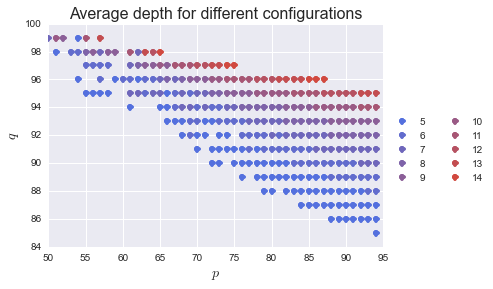

In [216]:
palette = sns.blend_palette(["#5470de", "#d1493f"], 10).as_hex()
plt.subplot(111)
for i in all_depth_pairs.keys()[4:14]:
    xv, yv = all_depth_pairs[i]
    plt.plot(xv,yv, 'o', color=palette[i-5], label=str(i))
plt.legend(ncol=2, loc=3, bbox_to_anchor=(1, .25))
plt.title("Average depth for different configurations", fontsize=16)
plt.xlabel("$p$", fontsize=14)
plt.ylabel("$q$", fontsize=14)
plt.show()

In [223]:
pairs_depth = {5: (.7,.92, 900),
               6: (.7,.93, 700),
               7: (.7,.94, 600),
               8: (.7,.95, 300),
               9: (.7,.96, 150),
               10: (.7,.97, 50),
               11: (.72,.98, 1)}

##Language 6: extended Dyck Language with 4 symbols

In [217]:
def word_rec2(p, q, i=0):
    #print i, p*(q**i)
    if np.random.binomial(1, p*(q**i)):
        if np.random.binomial(1, .5):
            return "(" + word_rec2(p, q, i+1) + ")" + word_rec2(p, q, i)
        else:
            return "[" + word_rec2(p, q, i+1) + "]" + word_rec2(p, q, i)
    else:
        return ""
    
def generate_language2(length, p,q):
    return "".join([word_rec2(p,q) for i in xrange(length)])

In [224]:
for key, value in pairs_depth.iteritems():
    lang = generate_language2(100*value[2], value[0],value[1])
    
    lname = "dyck6-depth-" + str(key) + ".txt"
    with open(lname, "w") as text_file:
        text_file.write(lang)